### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\uber-raw-data-aug14.csv")

df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [ ]:
# Convert the 'Date/Time' column to datetime format
df["Date/Time"]=pd.to_datetime(df["Date/Time"])

# Group by date and count the number of pickups
pickup=df.groupby(df['Date/Time'].dt.date).count()
pickup.head(1)

# Find the date with the highest number of pickups
highest=pickup.sort_values(by='Lat',ascending=False)
highest.index[0]
print("highest pickup happend on",highest.index[0])






In [3]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [5]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups

df[df['Date/Time'].dt.date==highest.index[0]]



# Get the count of pickups on the highest date
df['Date'] = df['Date/Time'].dt.date

# Group by the Date column and count the number of pickups
pickup_counts = df.groupby('Date').size()

# Find the maximum value
max_pickup_count = pickup_counts.max()

print(f"The highest number of pickups on a single date is {max_pickup_count}.")

The highest number of pickups on a single date is 32759.


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [6]:
# Count the number of unique TLC base companies
unique_company=df['Base'].nunique()
print("No of companies affiliates with Uber-",unique_company)



No of companies affiliates with Uber- 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [11]:
# Group by TLC base company and count the number of pickups
df.groupby(df['Date/Time'].dt.date)['Base'].count()
# Find the TLC base company with the highest number of pickups

base_pickups = df.groupby('Base').size()
base_pickups

Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [8]:
# Group by TLC base company and count the number of pickups

result = df.groupby('Base').size().reset_index(name='Pickup Count')

print(result)




     Base  Pickup Count
0  B02512         31472
1  B02598        220129
2  B02617        355803
3  B02682        173280
4  B02764         48591


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [22]:
# Extract the hour from the 'Date/Time' column

df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Hour'] = df['Date/Time'].dt.hour

print(df)
# Group by hour and count the number of pickups
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Hour'] = df['Date/Time'].dt.hour
print(df['Hour'].value_counts())
print(df.groupby('Hour').size())


# Find the hour with the highest number of pickups

# Convert the Date/Time column to a datetime object
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract the hour from the Date/Time column
df['Hour'] = df['Date/Time'].dt.hour

# Group by the Hour column and count the number of pickups
pickup_counts = df.groupby('Hour').size()

# Find the index of the maximum value
max_pickup_hour = pickup_counts.idxmax()

print(f"The hour with the highest number of pickups is {max_pickup_hour}.")

                 Date/Time      Lat      Lon    Base        Date  Hour
0      2014-08-01 00:03:00  40.7366 -73.9906  B02512  2014-08-01     0
1      2014-08-01 00:09:00  40.7260 -73.9918  B02512  2014-08-01     0
2      2014-08-01 00:12:00  40.7209 -74.0507  B02512  2014-08-01     0
3      2014-08-01 00:12:00  40.7387 -73.9856  B02512  2014-08-01     0
4      2014-08-01 00:12:00  40.7323 -74.0077  B02512  2014-08-01     0
...                    ...      ...      ...     ...         ...   ...
829270 2014-08-31 23:55:00  40.7552 -73.9753  B02764  2014-08-31    23
829271 2014-08-31 23:55:00  40.7552 -73.9753  B02764  2014-08-31    23
829272 2014-08-31 23:55:00  40.7617 -73.9788  B02764  2014-08-31    23
829273 2014-08-31 23:59:00  40.7395 -73.9889  B02764  2014-08-31    23
829274 2014-08-31 23:59:00  40.7270 -73.9802  B02764  2014-08-31    23

[829275 rows x 6 columns]
17    57122
18    55390
16    53481
19    53008
20    51674
21    51354
15    48197
22    46008
14    40644
13    35764
8

#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function

In [23]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups

x=df['Date/Time'].dt.date.value_counts()
x
# Create a line plot to visualize the number of pickups over time
x=df['Date/Time'].dt.date.value_counts()
x

Matplotlib is building the font cache; this may take a moment.


2014-08-07    32759
2014-08-01    32353
2014-08-21    32304
2014-08-06    30495
2014-08-14    30457
2014-08-08    30411
2014-08-13    29788
2014-08-12    29646
2014-08-22    29512
2014-08-15    28974
2014-08-02    28678
2014-08-28    28597
2014-08-05    28094
2014-08-20    27955
2014-08-29    27424
2014-08-23    27097
2014-08-27    27018
2014-08-09    26286
2014-08-16    26234
2014-08-04    24952
2014-08-19    24834
2014-08-26    24550
2014-08-30    23930
2014-08-31    23271
2014-08-03    23146
2014-08-11    22632
2014-08-25    22093
2014-08-24    22036
2014-08-18    21956
2014-08-17    21209
2014-08-10    20584
Name: Date/Time, dtype: int64

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

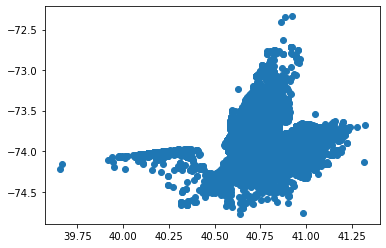

In [24]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.scatter(df['Lat'],df["Lon"])

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

<AxesSubplot:>

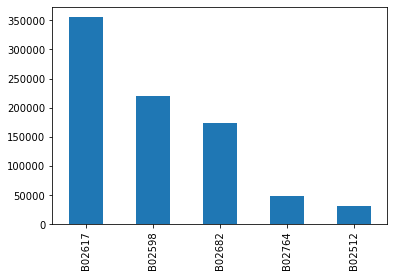

In [25]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
x=df['Base'].value_counts()
x.plot(kind='bar')

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

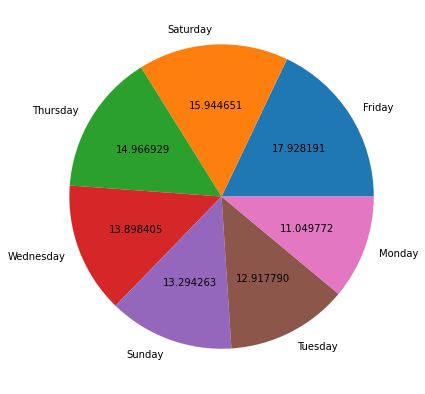

In [26]:
# Group by day of the week and count the number of pickups
x=df['Date/Time'].dt.day_name().value_counts()
x

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure(figsize=(10,7))
plt.pie(x.values, labels = x.index,autopct= '%f')
plt.show()